## Demographics, Education, Employment and Salary Analysis of Data Science Professsionals

#### Name:  Rohit Sanjay Tapas
#### Environment: Python 3 and Jupyter Notebook

#### The Files

- *multipleChoiceResponses.csv * : Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.                         
- *conversionRates.csv* : Currency conversion rates to USD. 



# Table of contents

* [1. Demographic analysis](#demographics)
   * [1.1. Age](#age)
   * [1.2. Gender](#gender)
   * [1.3. Country](#country)
* [2. Education](#education)
    * [2.1. Formal education](#formal)
* [3. Employment](#employment)
    * [3.1. Employment Status](#status)
* [4. Salary](#salary)
    * [4.1. Salary overview](#overview)
    * [4.2. Salary by country](#countrysal)
    * [4.3. Salary and gender](#gender_salary)
    * [4.4. Salary and formal education](#education_salary)
    * [4.5. Salary and job](#salary_job)
* [5. Predicting Salary](#pred)


## 0. Load your libraries and files
<a id="Load data"></a>
***


In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import percentile
%matplotlib inline

## 1. Demographic Analysis

***
##### So what does a data scientist look like?

Let's get a general understanding of the characteristics of the survey participants. Demographic overviews are a standard way to start an exploration of survey data. The types of participants can heavily affect the survey responses.

### 1.1 Age

Visualisation is a quick and easy way to gain an overview of the data. One method is through a boxplot. Boxplots are a way to show the distribution of numerical data and display the five descriptive statistics: minimum, first quartile, median, third quartile, and maximum. Outliers should also be shown.

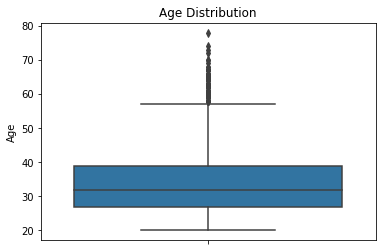

In [5]:
df1 = pd.read_csv("multipleChoiceResponses.csv")
bplot = sns.boxplot( y = 'Age', data=df1).set_title('Age Distribution')


Calculate the five descriptive statistics as shown on the boxplot, as well as the mean

Round your answer to the nearest whole number.

In [6]:
minimum = df1['Age'].min()
maximum = df1['Age'].max()
mean = df1['Age'].mean()
quartiles = percentile(df1['Age'], [25, 50, 75])

print('Minimum is ' + str(round(minimum)))
print('Maximum is ' + str(round(maximum)))
print('Mean is ' + str(round(mean)))
print('First Quartile is ' + str(round(quartiles[0])))
print('Median is ' + str(round(quartiles[1])))
print('Third Quartile is ' + str(round(quartiles[2])))

Minimum is 20
Maximum is 78
Mean is 34
First Quartile is 27.0
Median is 32.0
Third Quartile is 39.0


<span style="color: green">**Answer**</span>

Minimum is 20
Maximum is 78
Mean is 34
First Quartile is 27.0
Median is 32.0
Third Quartile is 39.0


By looking at the boxplot we can say that majority of the population have ages between 27-39.
The minimum age of the population is 20 and the maximum is 78. The median of the age is 32.
    Also, there are a few people who are above the age of 60.


Regardless of the errors that the data show, we are interested in working-age data scientists, aged between 18 and 65.  

How many respondents were under 18 or over 65?

In [7]:
age = df1['Age']
ranges = [0,18,65,100]
age.groupby(pd.cut(age, ranges)).count()

Age
(0, 18]         0
(18, 65]     3521
(65, 100]      19
Name: Age, dtype: int64

<span style="color: green">**Answer**</span>

None of the respondants are below the age of 18. 
19 respondants were over the age of 65.

### 1.2 Gender

We are interested in the gender of respondents. Within the STEM fields, there are more males than females or other genders. In 2016 the Office of the chief scientist found that women held only 25% of jobs in STEM. Let's see how data science compares. 



6. Plot the gender distribution of survey participants.

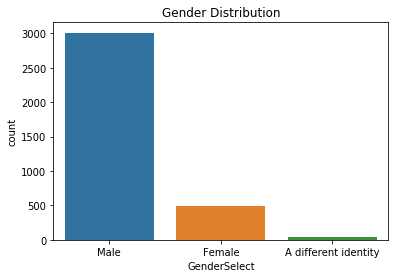

In [8]:
gendist = sns.countplot(x = 'GenderSelect', data=df1).set_title('Gender Distribution')



7. What percentage of respondants were men? What percentage of respondants were women?

In [9]:

df1['GenderSelect'].value_counts(normalize=True) * 100

Male                    84.971751
Female                  14.011299
A different identity     1.016949
Name: GenderSelect, dtype: float64



84.9% were men.
14% were women.

Let's see if there is any relationship between age and gender.

Create a box plot showing the age of all the participants according to gender.


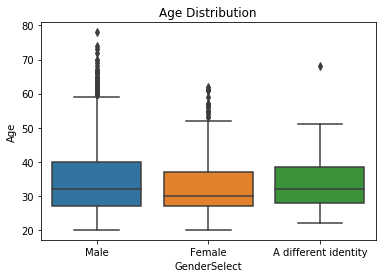

In [10]:
bplot = sns.boxplot(x = 'GenderSelect', y = 'Age', data=df1).set_title('Age Distribution')



9. What comments can you make about the relationship between the age and gender of the respondents?


In [11]:
a = df1['Age'][df1['GenderSelect'] == 'Male'].describe()
b = df1['Age'][df1['GenderSelect'] == 'Female'].describe()
c = df1['Age'][df1['GenderSelect'] == 'A different identity'].describe()
print(a)
print(b)
print(c)

count    3008.000000
mean       34.637633
std         9.555902
min        20.000000
25%        27.000000
50%        32.000000
75%        40.000000
max        78.000000
Name: Age, dtype: float64
count    496.000000
mean      32.735887
std        8.659951
min       20.000000
25%       27.000000
50%       30.000000
75%       37.000000
max       62.000000
Name: Age, dtype: float64
count    36.000000
mean     34.666667
std       9.844505
min      22.000000
25%      28.000000
50%      32.000000
75%      38.500000
max      68.000000
Name: Age, dtype: float64


<span style="color: green">**Answer**</span>

The average age of male respondants is 34.63. The youngest male respondant is 20 and the oldest is 78.
The average age of female respondants is 32.73. The youngest female respondant is 20 and the oldest is 62.
The average age of a different identity respondants is 34.66. The youngest a different identity respondant is 22 and the oldest is 68.

### 1.3 Country

We know that people practise data science all over the world. The United States is thought of as a 'hub' of commercial data science as well as research followed by the United Kingdom and Germany. 

Because the field is evolving so quickly, it may be that these perceptions, formed in the late 2000s are now inaccurate. So let's find out where data scientists live.


10. Create a bar graph of the respondants according to which country they are from.

Find the percentage of respondants from the top 5 countries


United States     31.807910
India             12.175141
United Kingdom     4.265537
Germany            3.672316
Brazil             3.587571
Name: Country, dtype: float64

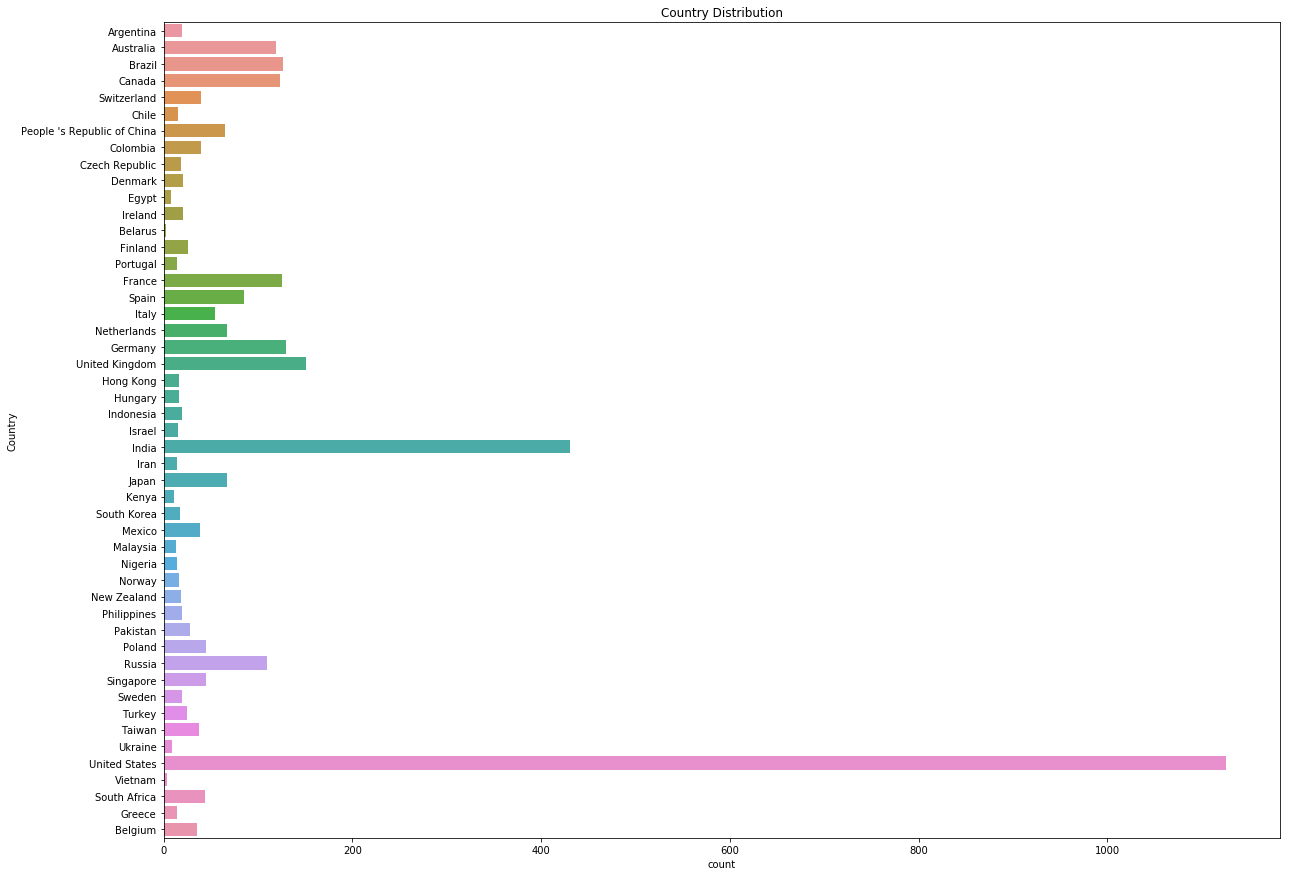

In [12]:
plt.subplots(figsize=(20,15))
coundistr = sns.countplot(y = 'Country' , data=df1).set_title('Country Distribution')
df1['Country'].value_counts(normalize=True).head() * 100

<span style="color: green">**Answer**</span>
The percentage of top 5 countries are:
United States     31.807910%
India             12.175141%
United Kingdom     4.265537%
Germany            3.672316%
Brazil             3.587571%


What comments can you make about our previous comments on the United States, United Kingdom and Europe?

Are the majority of data scientists now likely to come from those countries?


<span style="color: green">**Answer**</span>

The United States is till the leader by percentage for providing data scientists. 
India has taken second place ahead of UK and Germany.



Now that we have another demographic variable, let's see if there is any relationship between country, age and gender. We are specifically interested in the United States, India, United Kingdom, Germany and of course Australia!


Write code to output the mean and median age for United States, India, United Kingdom, Germany and Australia.

Hint: You may need to create a copy or slice.

In [13]:
indiaMeanMale = df1['Age'][df1['Country'] == 'India'][df1['GenderSelect']=='Male'].mean()
print('Mean Male age of India is ' + str(indiaMeanMale))
indiamedianMale = df1['Age'][df1['Country'] == 'India'][df1['GenderSelect']=='Male'].median()
print('Median Male age of India is ' + str(indiamedianMale),"\n")

indiaMeanFemale = df1['Age'][df1['Country'] == 'India'][df1['GenderSelect']=='Female'].mean()
print('Mean Female age of India is ' + str(indiaMeanFemale))
indiamedianFemale = df1['Age'][df1['Country'] == 'India'][df1['GenderSelect']=='Female'].median()
print('Median Female age of India is ' + str(indiamedianFemale),"\n")

indiaMeanAdf = df1['Age'][df1['Country'] == 'India'][df1['GenderSelect']=='A different identity'].mean()
print('Mean A different identity age of India is ' + str(indiaMeanAdf))
indiamedianAdf = df1['Age'][df1['Country'] == 'India'][df1['GenderSelect']=='A different identity'].median()
print('Median A different identity age of India is ' + str(indiamedianAdf),"\n")

UnitedStatesMeanMale = df1['Age'][df1['Country'] == 'United States'][df1['GenderSelect']=='Male'].mean()
print('Mean Male age of United States is ' + str(UnitedStatesMeanMale))
UnitedStatesmedianMale = df1['Age'][df1['Country'] == 'United States'][df1['GenderSelect']=='Male'].median()
print('Median Male age of United States is ' + str(UnitedStatesmedianMale),"\n")

UnitedStatesMeanFemale = df1['Age'][df1['Country'] == 'United States'][df1['GenderSelect']=='Female'].mean()
print('Mean Female age of United States is ' + str(UnitedStatesMeanFemale))
UnitedStatesmedianFemale = df1['Age'][df1['Country'] == 'United States'][df1['GenderSelect']=='Female'].median()
print('Median Female age of United States is ' + str(UnitedStatesmedianFemale),"\n")

UnitedStatesMeanAdf = df1['Age'][df1['Country'] == 'United States'][df1['GenderSelect']=='A different identity'].mean()
print('Mean A different identity age of United States is ' + str(UnitedStatesMeanAdf))
UnitedStatesmedianAdf = df1['Age'][df1['Country'] == 'United States'][df1['GenderSelect']=='A different identity'].median()
print('Median A different identity age of United States is ' + str(UnitedStatesmedianAdf),"\n")

UnitedKingdomMeanMale = df1['Age'][df1['Country'] == 'United Kingdom'][df1['GenderSelect']=='Male'].mean()
print('Mean Male age of United Kingdom is ' + str(UnitedKingdomMeanMale))
UnitedKingdommedianMale = df1['Age'][df1['Country'] == 'United Kingdom'][df1['GenderSelect']=='Male'].median()
print('Median Male age of United Kingdom is ' + str(UnitedKingdommedianMale),"\n")

UnitedKingdomMeanFemale = df1['Age'][df1['Country'] == 'United Kingdom'][df1['GenderSelect']=='Female'].mean()
print('Mean Female age of United Kingdom is ' + str(UnitedKingdomMeanFemale))
UnitedKingdommedianFemale = df1['Age'][df1['Country'] == 'United Kingdom'][df1['GenderSelect']=='Female'].median()
print('Median Female age of United Kingdom is ' + str(UnitedKingdommedianFemale),"\n")

UnitedKingdomMeanAdf = df1['Age'][df1['Country'] == 'United Kingdom'][df1['GenderSelect']=='A different identity'].mean()
print('Mean A different identity age of United Kingdom is ' + str(UnitedKingdomMeanAdf))
UnitedKingdommedianAdf = df1['Age'][df1['Country'] == 'United Kingdom'][df1['GenderSelect']=='A different identity'].median()
print('Median A different identity age of United Kingdom is ' + str(UnitedKingdommedianAdf),"\n")


AustraliaMeanMale = df1['Age'][df1['Country'] == 'Australia'][df1['GenderSelect']=='Male'].mean()
print('Mean Male age of Australia is ' + str(AustraliaMeanMale))
AustraliamedianMale = df1['Age'][df1['Country'] == 'Australia'][df1['GenderSelect']=='Male'].median()
print('Median Male age of Australia is ' + str(AustraliamedianMale),"\n")

AustraliaMeanFemale = df1['Age'][df1['Country'] == 'Australia'][df1['GenderSelect']=='Female'].mean()
print('Mean Female age of Australia is ' + str(AustraliaMeanFemale))
AustraliamedianFemale = df1['Age'][df1['Country'] == 'Australia'][df1['GenderSelect']=='Female'].median()
print('Median Female age of Australia is ' + str(AustraliamedianFemale),"\n")

AustraliaMeanAdf = df1['Age'][df1['Country'] == 'Australia'][df1['GenderSelect']=='A different identity'].mean()
print('Mean A different identity age of Australia is ' + str(AustraliaMeanAdf))
AustraliamedianAdf = df1['Age'][df1['Country'] == 'Australia'][df1['GenderSelect']=='A different identity'].median()
print('Median A different identity age of Australia is ' + str(AustraliamedianAdf),"\n")


GermanyMeanMale = df1['Age'][df1['Country'] == 'Germany'][df1['GenderSelect']=='Male'].mean()
print('Mean Male age of Germany is ' + str(GermanyMeanMale))
GermanymedianMale = df1['Age'][df1['Country'] == 'Germany'][df1['GenderSelect']=='Male'].median()
print('Median Male age of Germany is ' + str(GermanymedianMale),"\n")

GermanyMeanFemale = df1['Age'][df1['Country'] == 'Germany'][df1['GenderSelect']=='Female'].mean()
print('Mean Female age of Germany is ' + str(GermanyMeanFemale))
GermanymedianFemale = df1['Age'][df1['Country'] == 'Germany'][df1['GenderSelect']=='Female'].median()
print('Median Female age of Germany is ' + str(GermanymedianFemale),"\n")

GermanyMeanAdf = df1['Age'][df1['Country'] == 'Germany'][df1['GenderSelect']=='A different identity'].mean()
print('Mean A different identity age of Germany is ' + str(GermanyMeanAdf))
GermanymedianAdf = df1['Age'][df1['Country'] == 'Germany'][df1['GenderSelect']=='A different identity'].median()
print('Median A different identity age of Germany is ' + str(GermanymedianAdf),"\n")


Mean Male age of India is 29.553805774278214
Median Male age of India is 28.0 

Mean Female age of India is 29.06122448979592
Median Female age of India is 28.0 

Mean A different identity age of India is 22.0
Median A different identity age of India is 22.0 

Mean Male age of United States is 36.90687361419069
Median Male age of United States is 34.0 

Mean Female age of United States is 34.370892018779344
Median Female age of United States is 31.0 

Mean A different identity age of United States is 38.72727272727273
Median A different identity age of United States is 43.0 

Mean Male age of United Kingdom is 35.811023622047244
Median Male age of United Kingdom is 33.0 

Mean Female age of United Kingdom is 33.63636363636363
Median Female age of United Kingdom is 33.0 

Mean A different identity age of United Kingdom is 36.0
Median A different identity age of United Kingdom is 36.0 

Mean Male age of Australia is 37.15841584158416
Median Male age of Australia is 36.0 

Mean Female age


What Pattern do you notice about the relationship between age, gender for each of these countries?


<span style="color: green">**Answer**</span>

Pattern observed between age and gender is that mean and median Male ages are always more than their Female counterparts.
Mean and median ages for all countries for both Genders lie between 29-37

## 2. Education

***
So far we have seen that there may be some relationships between age, gender and the country that the respondents are from.  Next, we should look at what their education is like. 

### 2.1 Formal education


We saw in a recent activity that a significant number of job advertisements call for a masters degree or a PhD. Let's see if this is a reasonable ask based on the respondent's formal education. 

Plot and display as text output the number and percentage of respondents with each type of formal education.

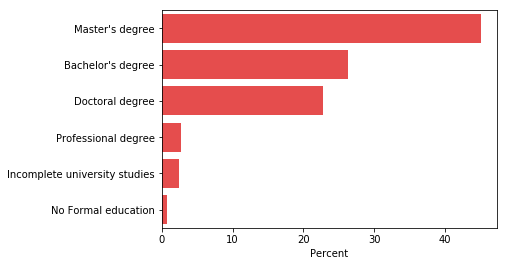

Master's degree                  45.028249
Bachelor's degree                26.271186
Doctoral degree                  22.824859
Professional degree               2.711864
Incomplete university studies     2.457627
No Formal education               0.706215
Name: FormalEducation, dtype: float64

In [61]:

yes = df1['FormalEducation']
edu  = df1['FormalEducation'].value_counts(normalize=True)*100
edu = edu[:6,]
ax = sns.barplot(edu.values, edu.index,alpha=0.8, color='red')
ax.set(xlabel="Percent")
plt.show()
edu

Based on what you have seen, do you think that a Master's or Doctoral degree is too unrealistic for job advertisers looking for someone with data science skills?

Give your reasons.

<span style="color: green">**Answer**</span>

No, I dont think that it is unrealistic as a mojor chunk of respondants have masters or doctoral degrees.

Let's see if the trend is reflected in the Australian respondents.

Plot and display as text output the number and percentage of Australian respondents with each type of formal education.

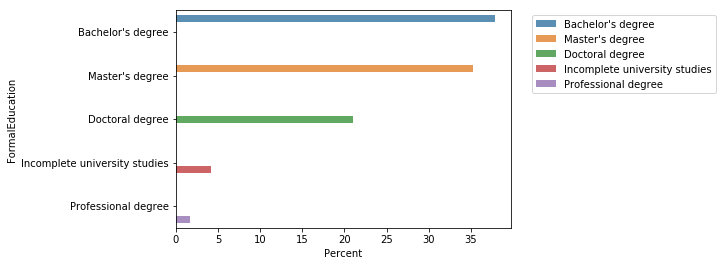

Bachelor's degree                37.815126
Master's degree                  35.294118
Doctoral degree                  21.008403
Incomplete university studies     4.201681
Professional degree               1.680672
Name: FormalEducation, dtype: float64

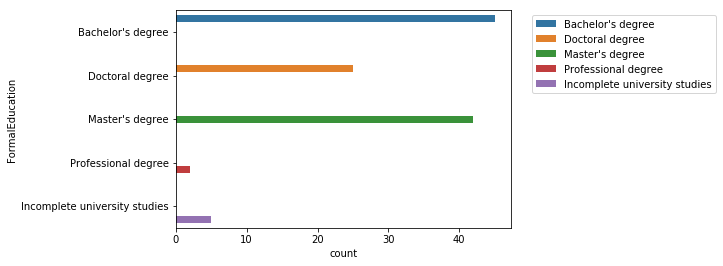

In [55]:
# Your code
Aus1 = df1['FormalEducation'][df1['Country']=='Australia']
Aus = df1['FormalEducation'][df1['Country']=='Australia'].value_counts(normalize=True)*100
Aus = Aus[:5,]
ax = sns.barplot(Aus.values,Aus.index, alpha = 0.8, hue = Aus.index)
ax.set(xlabel="Percent", ylabel='FormalEducation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
sns.countplot(y=Aus1 , data=df1,hue = Aus1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
Aus


Display as text output the mean and median age of each respondant according to each degree type.



In [16]:
mean = df1.groupby(['FormalEducation'])['Age'].mean()
print(mean,"\n")
median = df1.groupby(['FormalEducation'])['Age'].median()
print(median)

FormalEducation
Bachelor's degree                30.632258
Doctoral degree                  39.235149
Incomplete university studies    36.011494
Master's degree                  33.746550
No Formal education              41.680000
Professional degree              36.645833
Name: Age, dtype: float64 

FormalEducation
Bachelor's degree                28.0
Doctoral degree                  37.0
Incomplete university studies    35.0
Master's degree                  31.0
No Formal education              42.0
Professional degree              34.5
Name: Age, dtype: float64


## 3. Employment

***
After you complete your degree many of you will be seeking work. The graduate employment four months after graduation in Australia is 69.5%. At Monash, it is 70.1%. This is for all Australian degrees. Let's have a look at the state of the employment market for the respondents. 

Let's have a look at the data. 


### 3.1 Employment status

The type of employment will affect the salary of a worker. Those employed part-time will likely earn less than those who work full time. 

Plot the type of employment the respondents have on a bar chart.



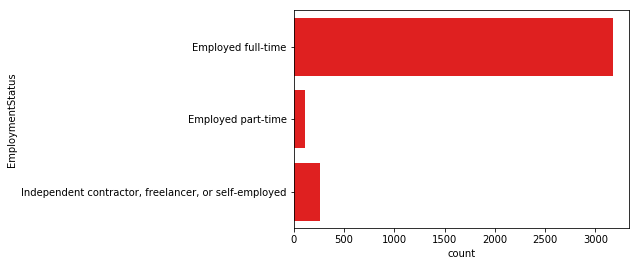

In [45]:
#plt.subplots(figsize=(20,15))
sns.countplot(y = 'EmploymentStatus', data=df1, color='red')

You may be wondering if your own degree and experince will help you gain full time employment after you graduate. 

Plot the respondants employment types against their degrees.



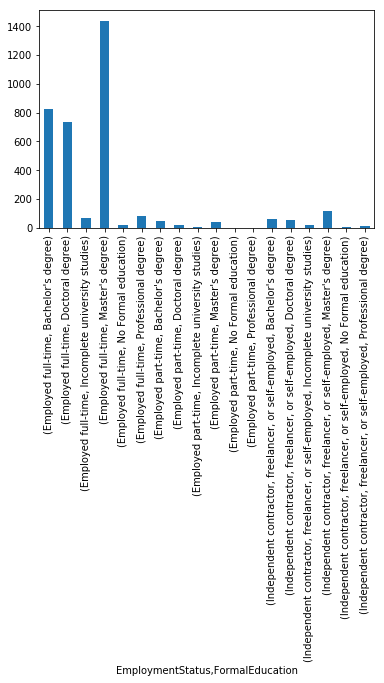

In [43]:
grp = df1.groupby(['EmploymentStatus','FormalEducation'])['Age'].count()
grp
grp.plot(kind = 'bar', x='EmploymentStatus',y='FormalEducation')


Looking at the graph, which degree is best to gain full-time employment?

What is odd about IT, networking or system administration??




Masters degree is the best to gain full-time employment. This is evident from the graph as more than 1400 respondants with a masters degree have full time jobs.



21. Overall, we know that 92.71% of respondents are employed, and 89.55% are employed full time. This may not be the same for every country. 
Print out the percentages of all respondents who are employed full time in Australia, United Kingdom and the United States.

In [37]:

Australia = df1[(df1['Country'] == 'Australia')]
UK = df1[(df1['Country'] == 'United Kingdom')]
US = df1[(df1['Country'] == 'United States')]
PAus = (Australia['EmploymentStatus'].value_counts(normalize=True)*100)
PUK = (UK['EmploymentStatus'].value_counts(normalize=True)*100)
PUS = (US['EmploymentStatus'].value_counts(normalize=True)*100)

print('Percentage respondants employed full time in Australia are : ' + str(PAus.head(1)))
print('Percentage respondants employed full time in United Kingdom are : ' + str(PUK.head(1)))
print('Percentage respondants employed full time in United States are : ' + str(PUS.head(1)))

Percentage respondants employed full time in Australia are : Employed full-time    84.87395
Name: EmploymentStatus, dtype: float64
Percentage respondants employed full time in United Kingdom are : Employed full-time    90.728477
Name: EmploymentStatus, dtype: float64
Percentage respondants employed full time in United States are : Employed full-time    91.474245
Name: EmploymentStatus, dtype: float64



Remember earlier we saw that age seemed to have some interesting characteristics when plotted with other variables. 

Let's find out the median age of employees by type of employment. 

 <div class="alert alert-block alert-info">
22. Plot a boxplot of the respondents age grouped by employment type.

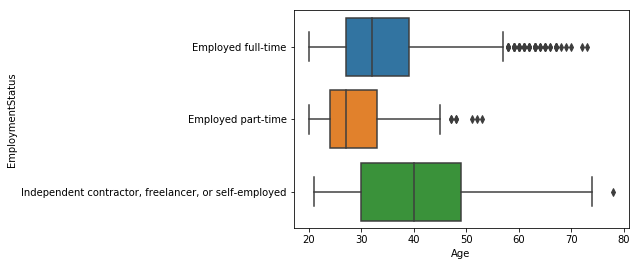

In [62]:

sns.boxplot(x='Age',y='EmploymentStatus', data = df1)

Now this is interesting, full time employees seem to be a little older than part time employees. Independent contactors, freelancers and self-employed respondents are older still. 

## 4. Salary


Data science is considered a very well paying role and was named 'best job of the year' for 2016. 

We had a look around and saw that data scientists were paid between $110,823 at IBM and 149,963 at Apple, in Australian dollars. 

On average it seems that $116,840 is what an Australian Data scientist can expect to earn. Do you think this is reasonable? Is this any different to the rest of the world? 

### 4.1 Salary overview

Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. *conversionRates.csv* contains the required exchange rates

Let's have a look at the data. 


23. Use the codes for each country to merge the files so that you can convert the salary data to Australian Dollars (AUD). Print out the maximum and median salary in AUD. Hint: think about what data type you have.

In [20]:

df2 = pd.read_csv("conversionRates.csv")
mergedf = pd.merge(left=df1,right=df2,left_on='CompensationCurrency',right_on='originCountry')

mergedf['AUD_Salary'] = mergedf['CompensationAmount']*mergedf['exchangeRateAUS']
AUD_median_salary = mergedf['AUD_Salary'].median()
AUD_max_salary = mergedf['AUD_Salary'].max()
print('Median salary in AUD is', AUD_median_salary)
print('Max salary in AUD is', AUD_max_salary)
mergedf

Median salary in AUD is 76998.417075
Max salary in AUD is 790290.0


,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,CompensationAmount,CompensationCurrency,Unnamed: 10,originCountry,exchangeRateUS,exchangeRateAUS,Rate,AUD_Salary
0,Male,Argentina,26,Employed full-time,Business Analyst,SQL,Bachelor's degree,Other,18000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,1311.203898
1,Male,Argentina,25,Employed full-time,Computer Scientist,Python,Bachelor's degree,Computer Science,24000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,1748.271864
2,Male,Argentina,24,Employed full-time,Machine Learning Engineer,Python,Bachelor's degree,Computer Science,247000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,17992.631267
3,Male,Argentina,25,Employed full-time,Machine Learning Engineer,Python,Bachelor's degree,"Information technology, networking, or system ...",546000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,39773.184906
4,Male,Argentina,29,Employed full-time,Data Scientist,Python,Doctoral degree,Mathematics or statistics,52000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,3787.922372
5,Male,Argentina,38,Employed full-time,Researcher,Python,Doctoral degree,Engineering (non-computer focused),360000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,26224.077960
6,Female,Argentina,33,Employed full-time,Data Scientist,R,Master's degree,Computer Science,32000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,2331.029152
7,Male,Argentina,43,Employed full-time,Data Miner,Python,Master's degree,Physics,32000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,2331.029152
8,Male,Argentina,30,Employed full-time,Data Scientist,Python,Master's degree,Engineering (non-computer focused),390000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,28409.417790
9,Male,Argentina,37,Employed full-time,Software Developer/Software Engineer,Python,Master's degree,Computer Science,500000.0,ARS,NaN,ARS,0.058444,0.072845,1.246401,36422.330500



24. Do those figures reflect the values at the beginning of this section? Why do you think so?


<span style="color: green">**Answer**</span>

Yes these figures reflect the value as we can see that on average a data scientist earns as much as thefigure given at the start of the section.

### 4.2 Salary by country


Since each country has different cost of living and pay indexes, we should see how they compare.


25. Plot a boxplot of the Australian respondents salary distribution. Print out the maximum and median salaries for Australian repsondnts.

Maximum salary for Australian respondants is  500000.0
Minimum salary for Australian respondants is  50000.0


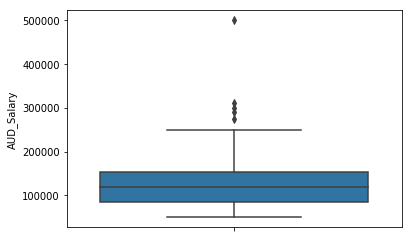

In [21]:

Con = mergedf['AUD_Salary'][mergedf['Country'] == 'Australia']
sns.boxplot(y = Con, data=mergedf)
max_sal = mergedf['AUD_Salary'][mergedf['Country'] == 'Australia'].max()
min_sal = mergedf['AUD_Salary'][mergedf['Country'] == 'Australia'].min()

print('Maximum salary for Australian respondants is ', max_sal)
print('Minimum salary for Australian respondants is ', min_sal)


26. Do those figures for Australia reflect the values at the beginning of this section?




Yes



27. Australia's salaries look pretty good.

Plot the salaries of all countries on a bar chart.

Hint: Adjust for full-time employees only

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


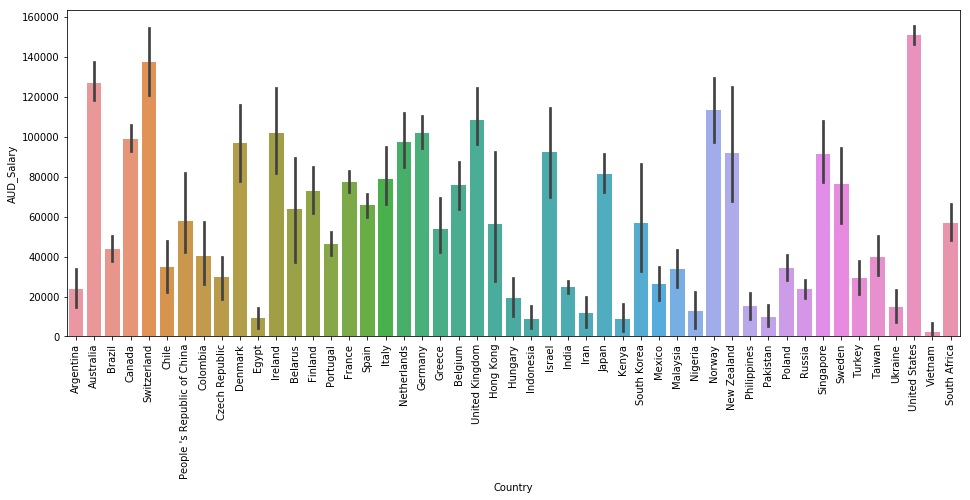

In [22]:

FT=mergedf['Country']

Con = mergedf['AUD_Salary'][mergedf['EmploymentStatus'] == 'Employed full-time']
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=FT ,y = Con, data=mergedf)
for item in ax.get_xticklabels():
    item.set_rotation(90)


 <div class="alert alert-block alert-warning">
28. What do you notice about the distributions? What do you think is the cause of this?




More developed countries have a higher average salary.

### 4.3 Salary and Gender

The gender pay gap in the tech industry is a big talking point. Let's see if the respondents are noticing the effect.





29. Plot the salaries of all countries grouped by gender on a boxplot.


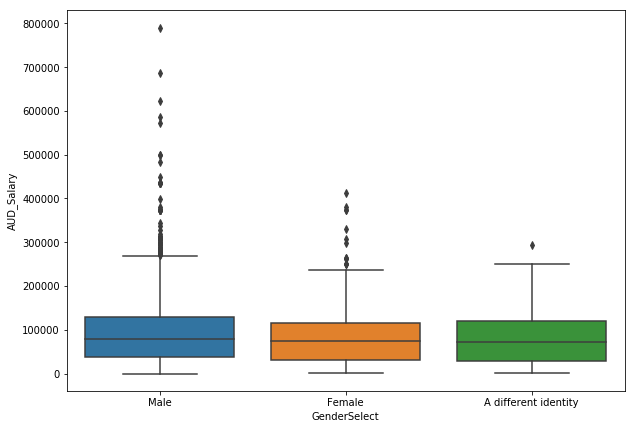

In [23]:

plt.subplots(figsize=(10,7))
Con = mergedf['AUD_Salary']
bplot = sns.boxplot(x= 'GenderSelect', y =Con, data=mergedf)


30. What do you notice about the distributions?




It can be observed that the average male population earns a little more than the average female population. Males have the higher maximum salaries.




31. The salaries may be affected by the country the responant is from. In Australia the weekly difference in pay between men and women is 17.7% and in the United states it is 26%.

Print the median salaries of Australia, United States and India grouped by gender.


In [24]:

IndMedMalSal = mergedf['AUD_Salary'][mergedf['Country'] == 'India'][mergedf['GenderSelect']=='Male'].median()
print('Median Male salary of India in AUD is ' + str(IndMedMalSal))
IndMedFemSal = mergedf['AUD_Salary'][mergedf['Country'] == 'India'][mergedf['GenderSelect']=='Female'].median()
print('Median female salary of India in AUD is ' + str(IndMedFemSal),"\n")

AusMedMalSal = mergedf['AUD_Salary'][mergedf['Country'] == 'Australia'][mergedf['GenderSelect']=='Male'].median()
print('Median Male salary of Australia in AUD is ' + str(AusMedMalSal))
AusMedFemSal = mergedf['AUD_Salary'][mergedf['Country'] == 'Australia'][mergedf['GenderSelect']=='Female'].median()
print('Median female salary of Australia in AUD is ' + str(AusMedFemSal),"\n")

USMedMalSal = mergedf['AUD_Salary'][mergedf['Country'] == 'United States'][mergedf['GenderSelect']=='Male'].median()
print('Median Male salary of United States in AUD is ' + str(USMedMalSal))
USMedFemSal = mergedf['AUD_Salary'][mergedf['Country'] == 'United States'][mergedf['GenderSelect']=='Female'].median()
print('Median female salary of United States in AUD is ' + str(USMedFemSal),"\n")

Median Male salary of India in AUD is 17327.21776
Median female salary of India in AUD is 12654.7096 

Median Male salary of Australia in AUD is 130000.0
Median female salary of Australia in AUD is 82000.0 

Median Male salary of United States in AUD is 143336.116955
Median female salary of United States in AUD is 112176.09152999999 



### 4.4 Salary and formal education


*Is getting your master's really worth it ?*
*Do PhDs get more money?*

Let's see.


32. Plot the salary distribution of all respondants and group by formal education type on a boxplot.


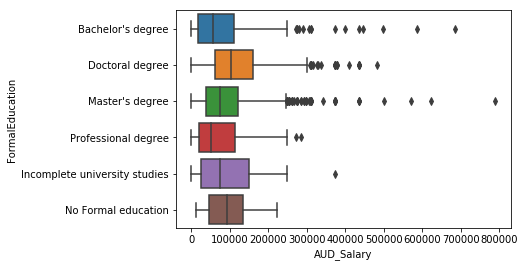

In [60]:

Con = mergedf['AUD_Salary']
bplot = sns.boxplot(y= 'FormalEducation', x =Con, data=mergedf)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


33. Is it better to get your Masters or PhD? 

Explain your answer.


PhD will get you a higher average salary than a Master's degree

### 4.5 Salary and job

So are data scientists the highest paid in the industry?  Or are there lesser known roles that are hiding from the spotlight?



34. Plot a bar chart of average salary (with error bars) of full time employees and group by job title.

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


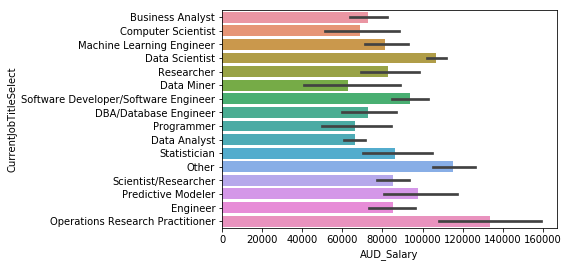

In [26]:

FT=mergedf['CurrentJobTitleSelect']
Con = mergedf['AUD_Salary'][mergedf['EmploymentStatus'] == 'Employed full-time']
sns.barplot(y=FT ,x = Con, data=mergedf)



35. Which job earns the most? Give a brief explaination of that job.



On an average, Operations Resarch Practitioners earn the most. Their job includes identifying the business problem, gathering data, examining the data and analyze it statistically. Moreover, they also form reports and documentation about the same.



36. So why are data scientists in the spotlight? Plot the salary distribution of full-time employees and group by job title as boxplots.

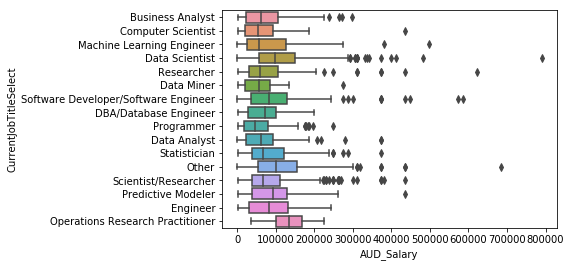

In [27]:

FT=mergedf['CurrentJobTitleSelect']
#FT = df1.groupby('Country').apply(list)
Con = mergedf['AUD_Salary'][mergedf['EmploymentStatus'] == 'Employed full-time']
sns.boxplot(y=FT ,x = Con, data=mergedf)


37. Do the boxplots give some insight into why data scientists may receive so much attention?

Explain your answer.



Data scientists receive so much attention as it is one of the best paid jobs. They have a higher highest salary and one of the highest mean salary.

## 5. Predicting salary


We have looked at many variables and seen that there are a lot of factors that could affect your salary.  

Let's say we wanted to reduce it though? One method we could use is a linear regression. This is a very basic model that can give us some insights. Note though, there are more robust ways to predict salary based on categorical variables. But this exercise will give you a taste of predictive modelling.


38. Plot the salary distribution and age of respondants on a scatterplot.

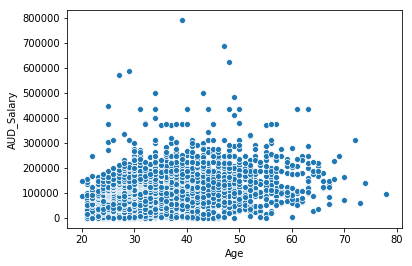

In [28]:

sns.scatterplot(x="Age", y="AUD_Salary", data=mergedf)



39. There may be a weak relationship. Let's refine this.

Create a linear regression between the salary and age of full-time Australian respondants. Plot the linear fit over the scatterplot.

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


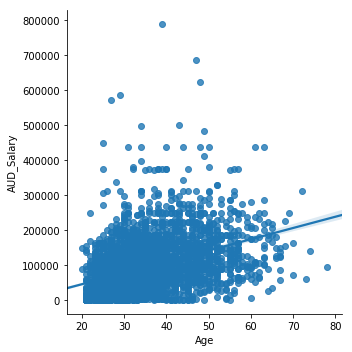

In [29]:

sns.lmplot(x="Age", y="AUD_Salary", data=mergedf)


40. Do You think that this is a good way to predict salaries?

Explain your answer.



Yes, I think it is a good way to predict salaries as we have seen the relationship between the two variables i.e. salary and age.
As the two variables are related we can say that with linear regression we can predict the salary for a given value of age.

For reassurance, the Graduate Careers Australia 2016 survey found the median salary for masters graduates in Computer Science and IT was $76,000.

## Exploratory Analysis on Other Data


This dataset has been downloaded from kaggle.
https://www.kaggle.com/blitzr/movehub-city-rankings#movehubcostofliving.csv


1. Purpose of the Data:
    This data compares the cost of living of various cities around the world. Using this data we can find out how well the cities rate in terms of cost of living
  
2. Ethics and privacy issues:
    There are no ethics and privacy issues as this is a public dataset.

3. Environmental impact:
    This data has no environmental impact.
    
4. Societal benefit:
    With the help of this data, it will be benficial in underestanding the best and most affordable cities to live in. This will help the society in terms of future planning. Also, cities will look to improve their ranking to attract tourists.
    
5. Health benefit:
    This data has no health benefit.
    
6. Commercial benefit:
    This data has huge commercial benefit as it can help cities improve themselves, which in return will attract more people and increase revenue.

7. Visualizations:
Plot average income of all cities

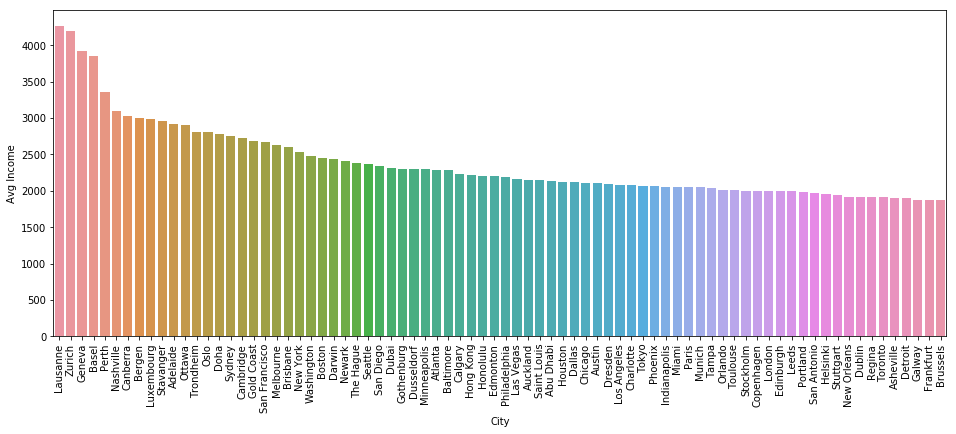

In [30]:
df2 = pd.read_csv("CostOfLiving.csv")
plt.figure(figsize=(16, 6))
ax = sns.barplot(y = "Avg Income", x = 'City', data=df2)

for item in ax.get_xticklabels():
    item.set_rotation(90)

Is there any relation between rent and income?

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


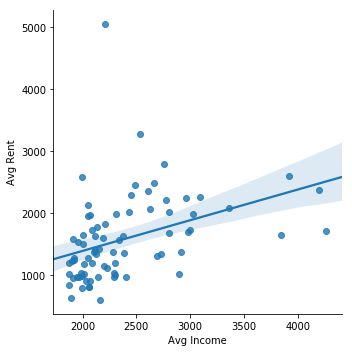

In [31]:
sns.lmplot(y="Avg Rent", x="Avg Income", data=df2)

Hence from the above plot we can predict that the higher the average income, the higher will be the average rent.

Compare the wine prices of all cities

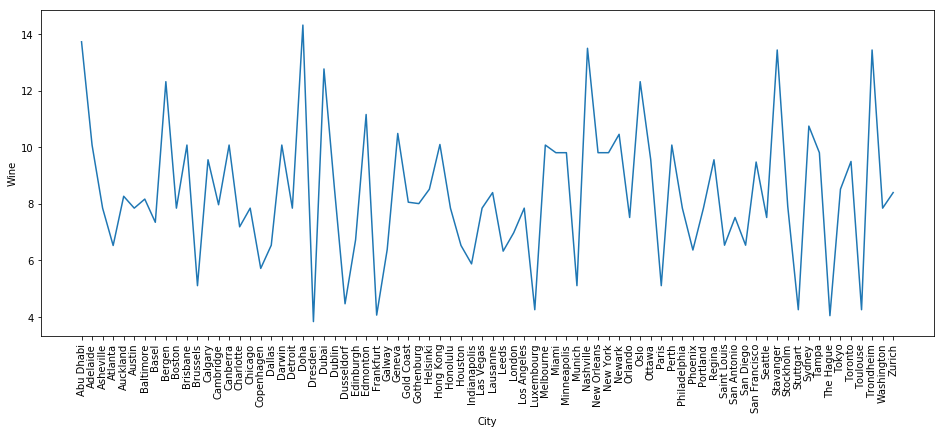

In [38]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="City", y="Wine", data=df2)
for item in ax.get_xticklabels():
    item.set_rotation(90)

Here we can see that more developed and densely populated cities have a higher rates of wine.
Moreover, cities like Abu Dhabi, where the culture and religion does not support consumption of alchohol have higher rates too.